# NAME: SRAMANA ROUTH


# Data Science & Business Analytics Tasks

# TASK 2: Prediction using Unsupervised ML

# AIM OF THE PROJECT:

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

# STEPS:

### 1. At first we import the necessary libraries.
### 2. Then we read the iris dataset and the necessary details about it. Then we visualise the dataset using seaborn.
### 3. Then we select the dataset features in the variable x.
### 4. Then we will implement 'The elbow method' on the Iris dataset which is used to calculate the optimum value of k and we will visualise the elbow method using seaborn.
### 5. Then we will Implement k-means clustering with k=3.
### 6.  And finally we will visualise clustering using matplotlib.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IRIS DATASET: This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [9]:
data=pd.read_csv("C:\\Users\\Sramana Routh\\Downloads\\Iris.csv", encoding= 'unicode_escape')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.shape

(150, 5)

In [28]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Visualising iris dataset using Seaborn.

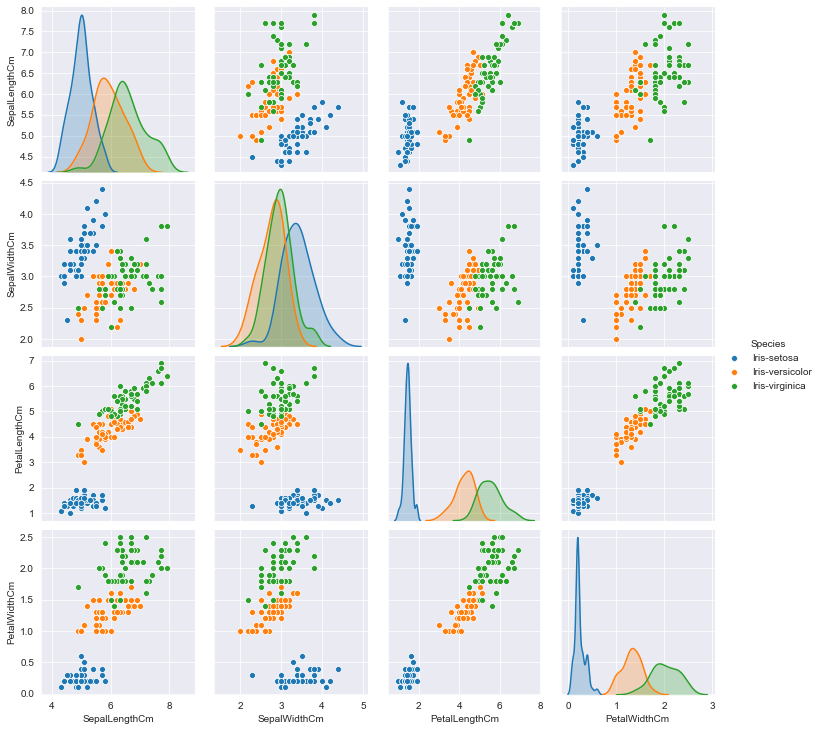

In [30]:
sns.set_style('darkgrid')
sns.pairplot(data,hue='Species',kind='scatter');


In [10]:
from sklearn.cluster import KMeans

# Select iris dataset features into variable x.

In [31]:
x = data.iloc[:, [0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification. So we will use this method to calculate the optimum value of k.

In [39]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Visualisation of 'The Elbow Method' using Seaborn

Text(0, 0.5, 'Within Cluster Sum of Squares(wcss)')

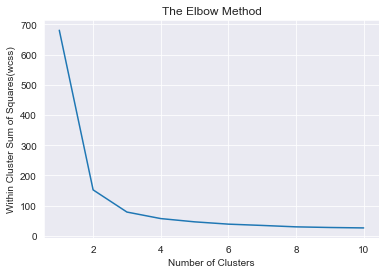

In [56]:
sns.lineplot(x=range(1,11),y=wcss);
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares(wcss)")

### As we can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph, so we can say that the optimum number of clusters is 3.

### Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

# Implement k-means clustering with k=3

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Finally, it is time to visualize the three clusters that were formed with the optimal k value. we can clearly see three clusters in the image below, with each cluster represented by a different color and centroids with black color.

# Visualising Clustering

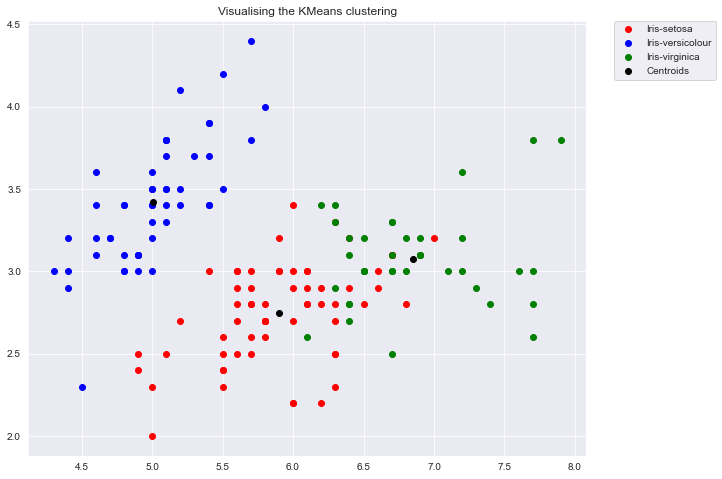

In [55]:
plt.figure(figsize=(10,8))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'r', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'b', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'g', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color = 'k', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);
plt.title("Visualising the KMeans clustering")
plt.show();